**Problem Statement:
This project aims to predict player engagement levels in online gaming environments using machine learning models. By analyzing comprehensive metrics and demographics related to player behavior, we seek to identify patterns and trends that influence player retention. The goal is to develop predictive models that provide actionable insights for optimizing game design, marketing strategies, and improving overall player experience while also identifying potential risks associated with gaming behavior.**

Importing important libraries


In [ ]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [1]:
df = pd.read_csv('/content/drive/MyDrive/Capstone 2/online_gaming_behavior_dataset.csv')

NameError: name 'pd' is not defined

Exploratory Data Analysis

In [ ]:
df.head(5)

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [ ]:
df.shape

(40034, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [ ]:
df.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [ ]:
df.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

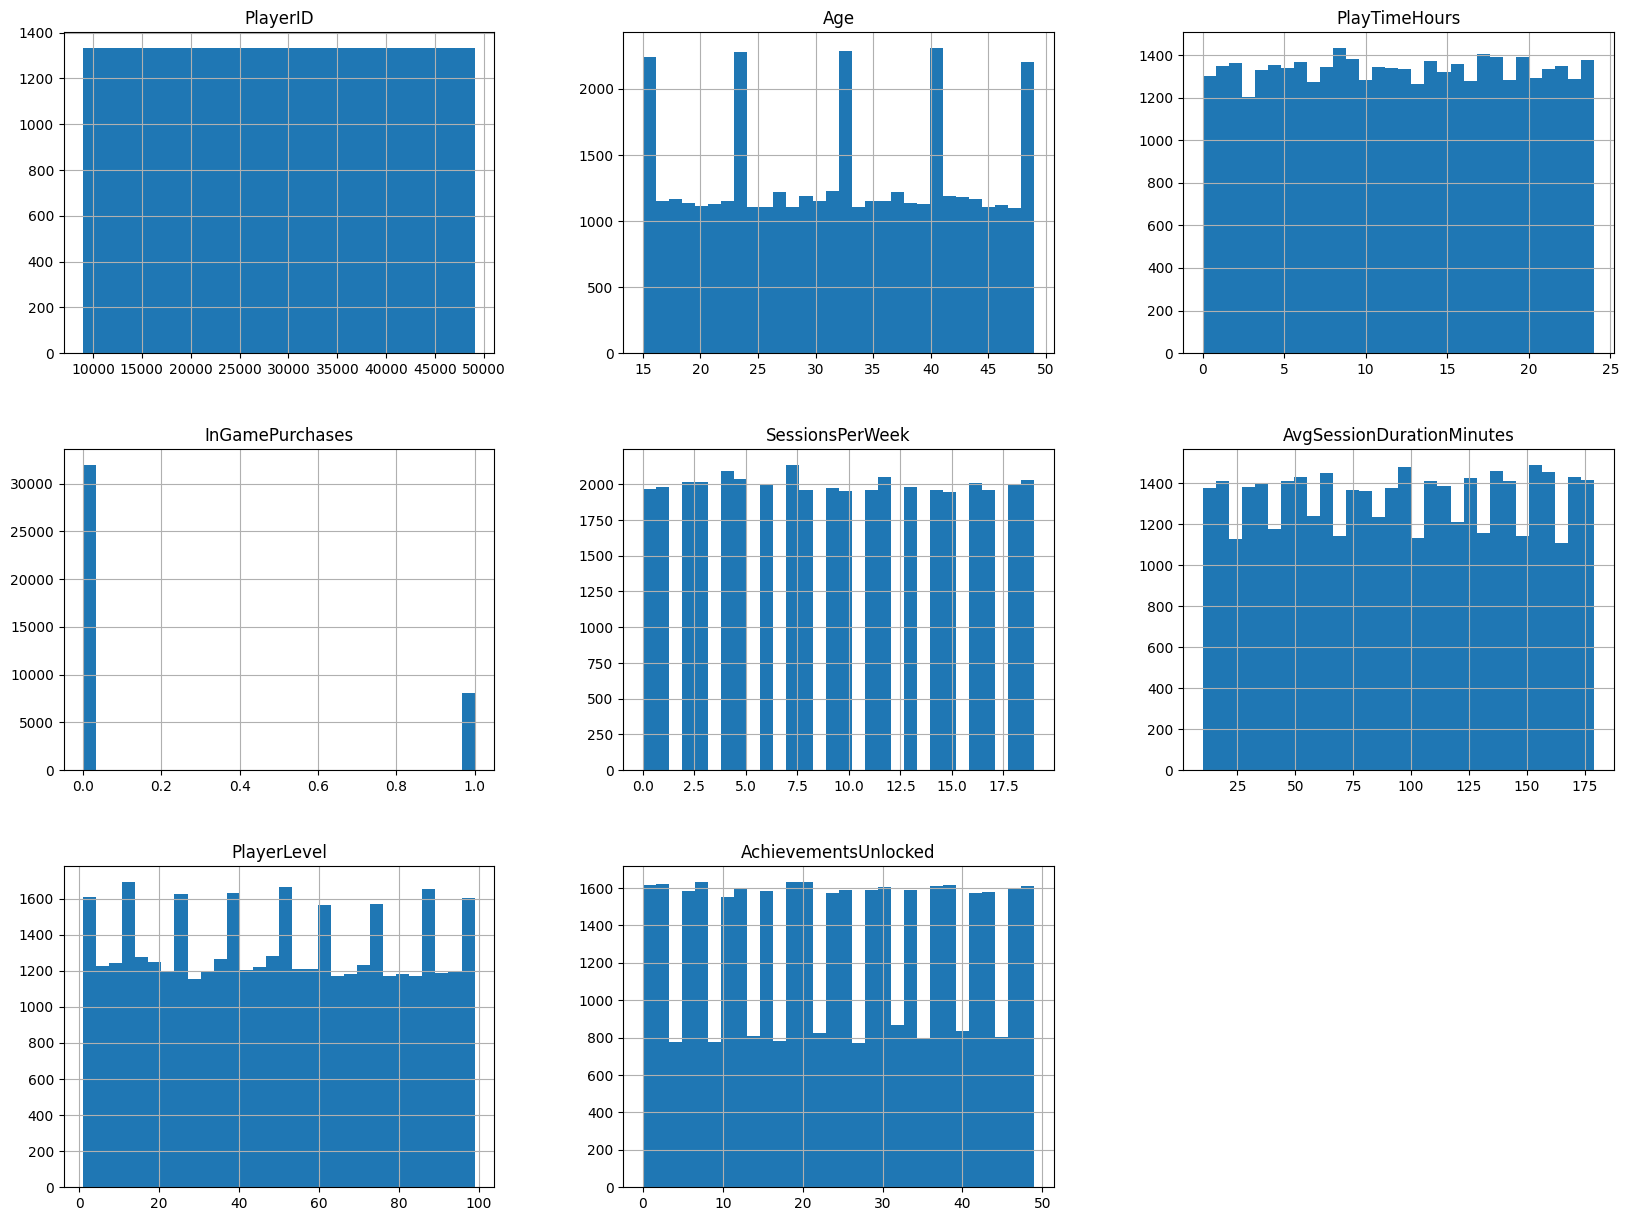

In [ ]:
#Data Visualization
df.hist(bins = 30, figsize= (20,15))
plt.show()

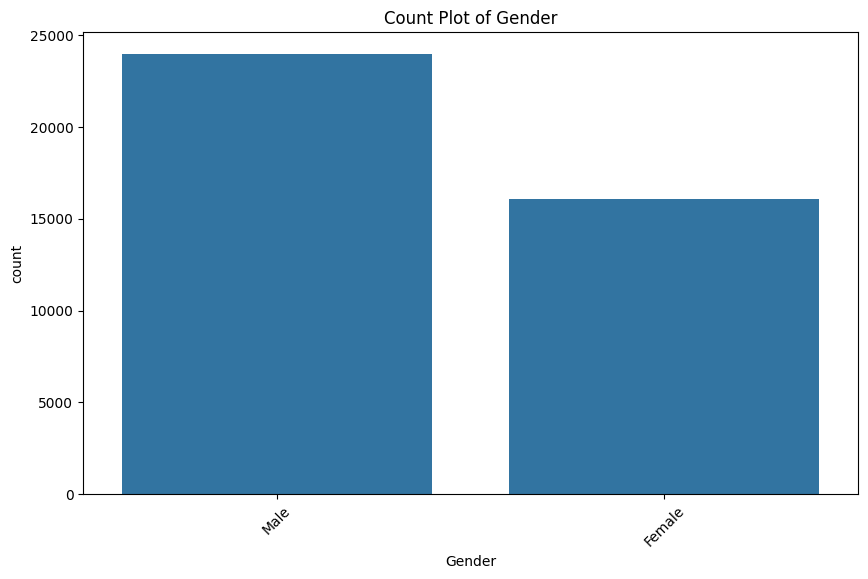

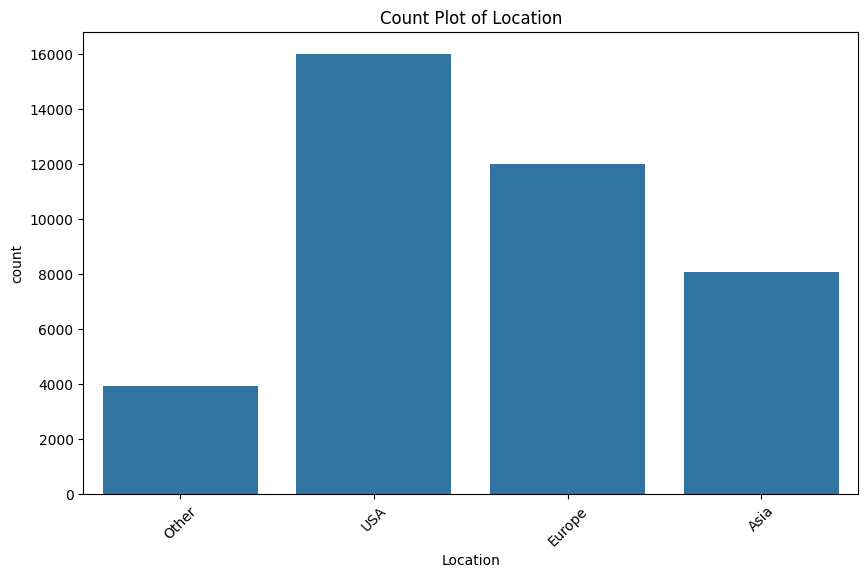

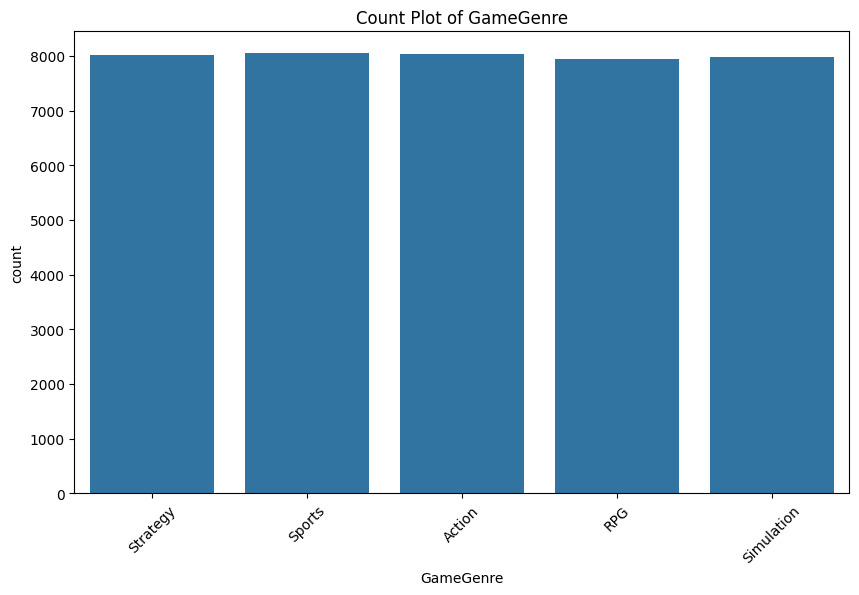

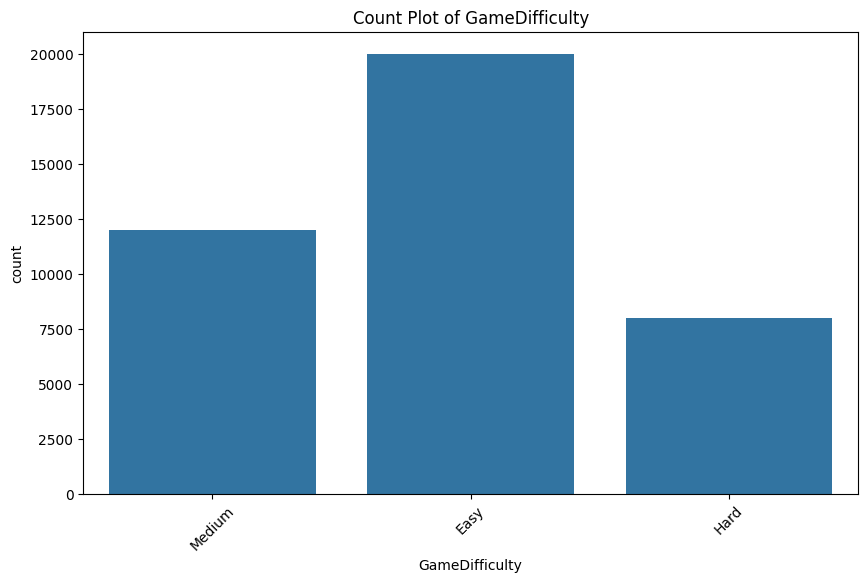

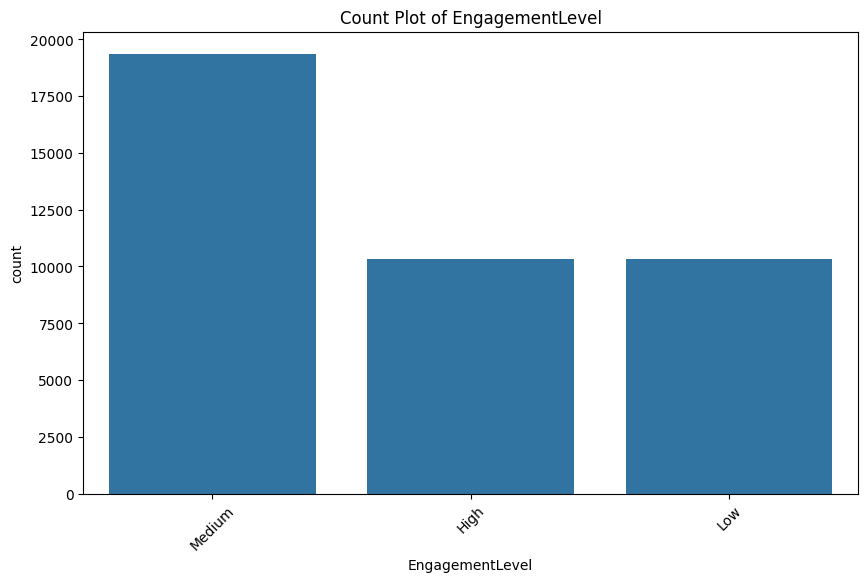

In [ ]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Plot count plots for categorical columns
for col in categorical_cols:
  plt.figure(figsize=(10,6))
  sns.countplot(x=col, data=df)
  plt.title(f'Count Plot of {col}')
  plt.xticks(rotation=45)
  plt.show()


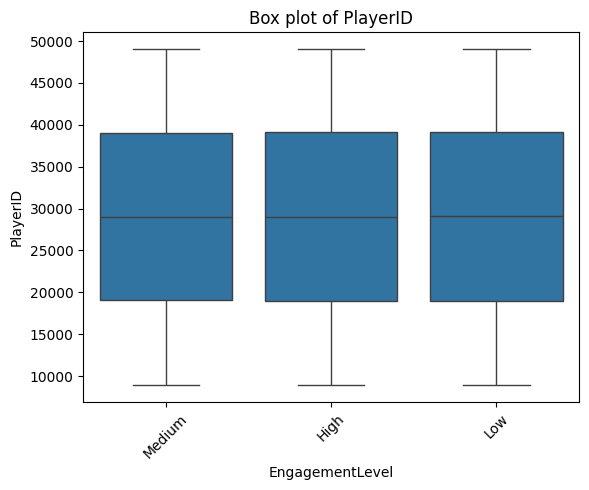

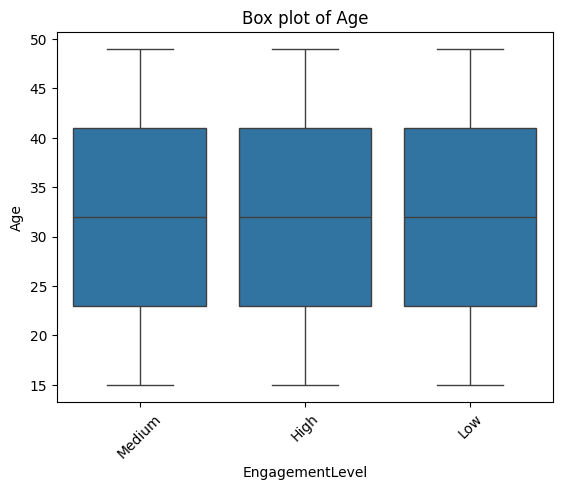

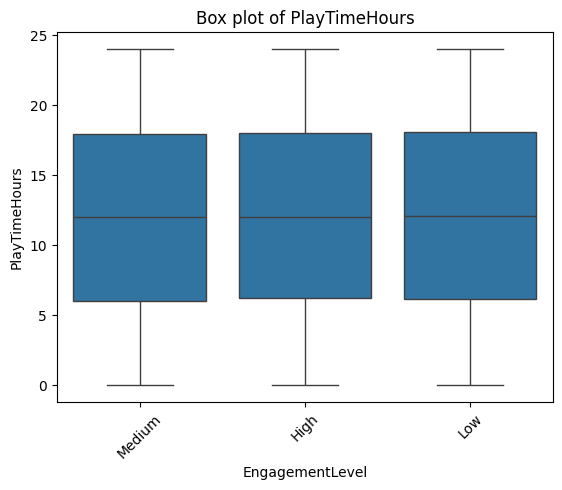

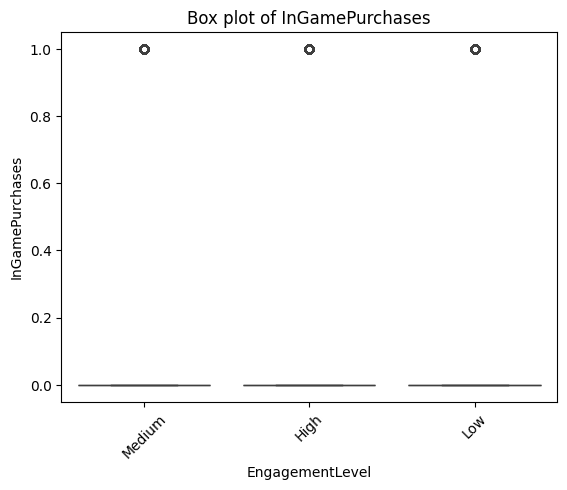

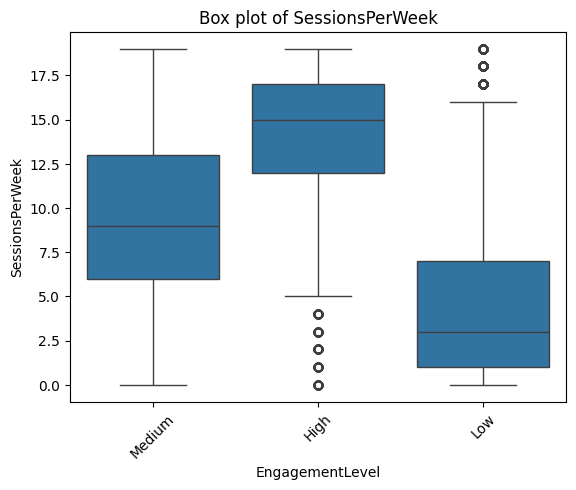

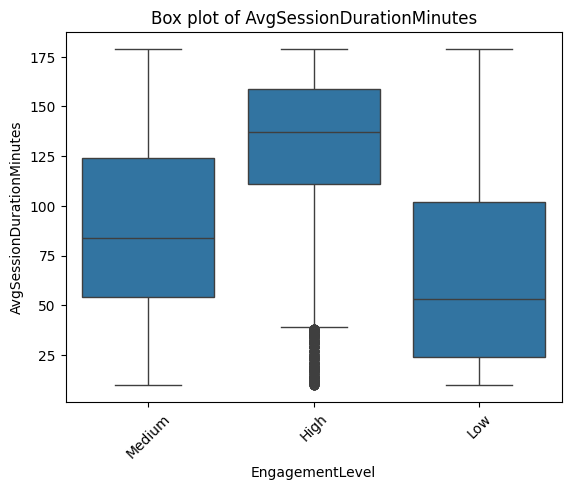

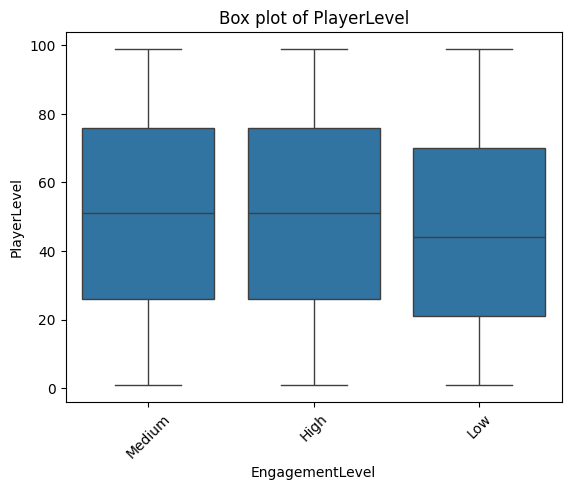

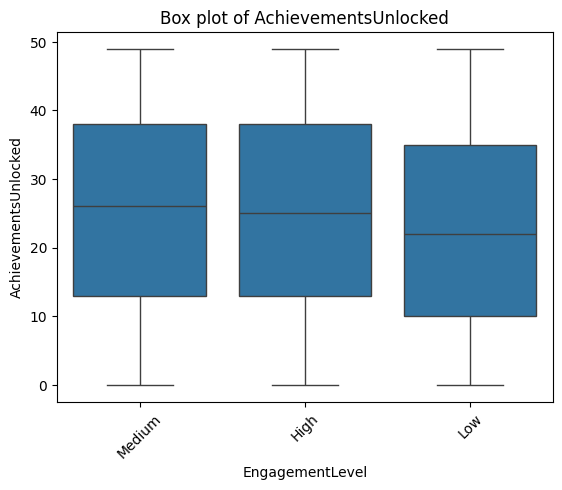

In [ ]:
numerical_feature = (df.dtypes == 'int64') |( df.dtypes == 'float64')
for i in numerical_feature.index:
  if numerical_feature[i]:
   sns.boxplot(x = 'EngagementLevel',y= i,  data = df)
   plt.title(f'Box plot of {i}')
   plt.xticks(rotation=45)
   plt.show()

**We understand that the data does not have any null value. It has 40034 observation and 13 variables. It has 5 categorical and 9 numerical variable.**

#Data Transformation
Changing categorical data into numerical data

In [ ]:
print(categorical_cols)

Index(['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel'], dtype='object')


In [ ]:
for i in categorical_cols:
  print(df[i].value_counts())

Gender
Male      23959
Female    16075
Name: count, dtype: int64
Location
USA       16000
Europe    12004
Asia       8095
Other      3935
Name: count, dtype: int64
GameGenre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count, dtype: int64
GameDifficulty
Easy      20015
Medium    12011
Hard       8008
Name: count, dtype: int64
EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64


We will do manual encoding as every variable has less no of varying data

In [ ]:
#Manual Encoding for categorical data
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Location'] = df['Location'].map({'USA': 0, 'Europe': 1, 'Asia': 2, 'Other': 3})
df['GameGenre'] = df['GameGenre'].map({'Sports': 0, 'Action': 1, 'Strategy': 2, 'Simulation': 3, 'RPG': 4})
df['GameDifficulty'] = df['GameDifficulty'].map({'Easy': 0, 'Medium': 1, 'Hard': 2})
df['EngagementLevel'] = df['EngagementLevel'].map({'Medium': 0, 'High': 1, 'Low': 2})

In [ ]:
for i in categorical_cols:
  print(df[i].value_counts())

Gender
0    23959
1    16075
Name: count, dtype: int64
Location
0    16000
1    12004
2     8095
3     3935
Name: count, dtype: int64
GameGenre
0    8048
1    8039
2    8012
3    7983
4    7952
Name: count, dtype: int64
GameDifficulty
0    20015
1    12011
2     8008
Name: count, dtype: int64
EngagementLevel
0    19374
1    10336
2    10324
Name: count, dtype: int64


In [ ]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,0,3,2,16.271119,0,1,6,108,79,25,0
1,9001,29,1,0,2,5.525961,0,1,5,144,11,10,0
2,9002,22,1,0,0,8.223755,0,0,16,142,35,41,1
3,9003,35,0,0,1,5.265351,1,0,9,85,57,47,0
4,9004,33,0,1,1,15.531945,0,1,2,131,95,37,0


Eliminating the variables like  PlayerId and InGamePurchases as it gives the singularity and high cardinality issue

**Feature Selection**

In [ ]:
df.drop(["Gender","InGamePurchases","PlayerID" ], axis=1, inplace = True )

In [ ]:
df.columns

Index(['Age', 'Location', 'GameGenre', 'PlayTimeHours', 'GameDifficulty',
       'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel',
       'AchievementsUnlocked', 'EngagementLevel'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        40034 non-null  int64  
 1   Location                   40034 non-null  int64  
 2   GameGenre                  40034 non-null  int64  
 3   PlayTimeHours              40034 non-null  float64
 4   GameDifficulty             40034 non-null  int64  
 5   SessionsPerWeek            40034 non-null  int64  
 6   AvgSessionDurationMinutes  40034 non-null  int64  
 7   PlayerLevel                40034 non-null  int64  
 8   AchievementsUnlocked       40034 non-null  int64  
 9   EngagementLevel            40034 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 3.1 MB


# Spliting X and Y variable and Scaling the data.
Now, we have a clean data with all numerical variable so now splitting the data into X and Y variable. Scaling the data afterwards.

In [ ]:
X = df.drop('EngagementLevel', axis=1)
y = df['EngagementLevel']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(32027, 9)
(8007, 9)
(32027,)
(8007,)


In [ ]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)



# Training the Data and Evaluating on  Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth= 10,min_samples_leaf= 4,min_samples_split=10)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10)

Decision Tree Accuracy: 89.99625327838142
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      3807
           1       0.91      0.88      0.90      2054
           2       0.91      0.84      0.87      2146

    accuracy                           0.90      8007
   macro avg       0.90      0.89      0.90      8007
weighted avg       0.90      0.90      0.90      8007



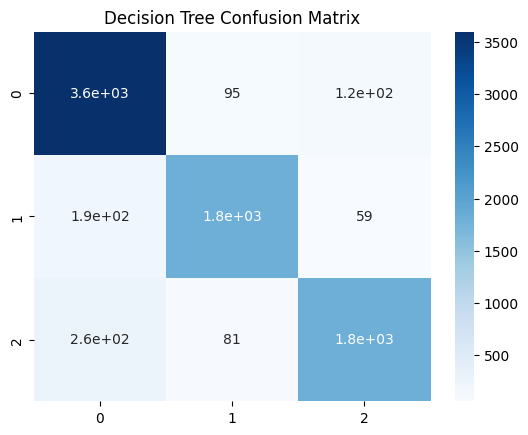

In [ ]:
# Make predictions on the testing set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy*100)

# Generate a classification report
print(classification_report(y_test, y_pred_dt))

# Create a confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()


In [ ]:
#

# Training the Data and Evaluating on Random Forest

In [ ]:
# Train a Random Forest model
rf_model = RandomForestClassifier( random_state=42, criterion='entropy', max_depth = None, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 100)
rf_model.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       random_state=42)

In [ ]:
# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)


Random Forest Accuracy: 0.9148245285375297
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3807
           1       0.92      0.89      0.90      2054
           2       0.93      0.87      0.90      2146

    accuracy                           0.91      8007
   macro avg       0.92      0.90      0.91      8007
weighted avg       0.92      0.91      0.91      8007



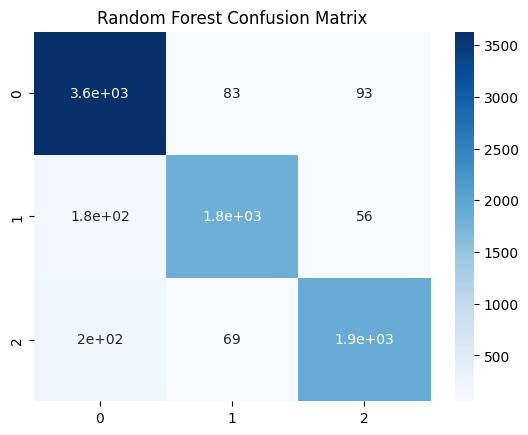

In [ ]:
# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

# Generate a classification report
print(classification_report(y_test, y_pred_rf))

# Create a confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

                     Feature  Importance
5            SessionsPerWeek   40.321939
6  AvgSessionDurationMinutes   33.981635
7                PlayerLevel    5.781611
3              PlayTimeHours    5.676016
8       AchievementsUnlocked    5.352372
0                        Age    4.211170
2                  GameGenre    1.926882
1                   Location    1.527784
4             GameDifficulty    1.220591


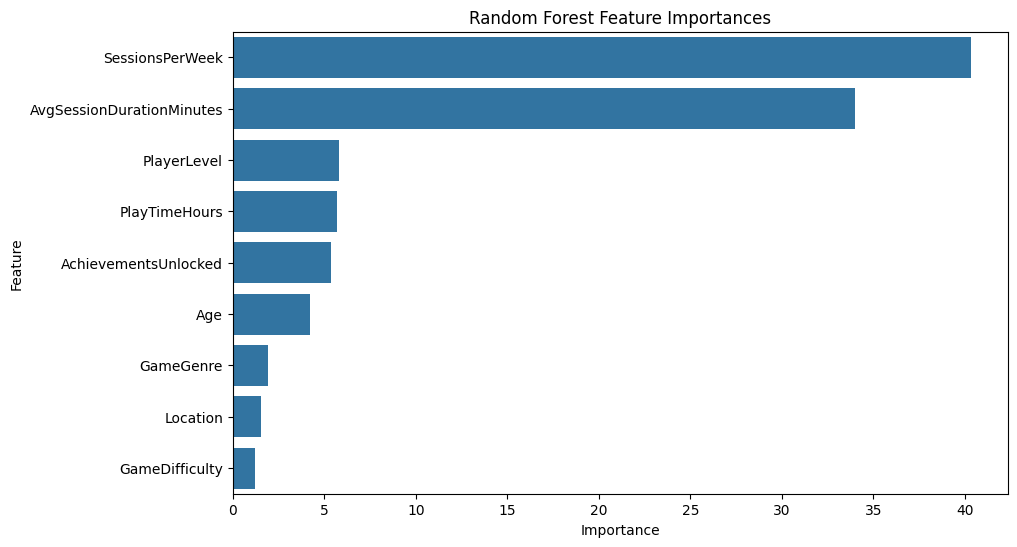

In [ ]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to visualize feature importances
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances*100})
feature_df = feature_df.sort_values(by='Importance', ascending=False)
print(feature_df)
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Random Forest Feature Importances')
plt.show()


In [ ]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
# Create a GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf,
                              scoring='accuracy',
                              cv=5,
                              n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters (Random Forest):", grid_search_rf.best_params_)
print("Best Score (Random Forest):", grid_search_rf.best_score_)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_


NameError: name 'GridSearchCV' is not defined

# Training the data and model on Gradient Boosting

In [ ]:
# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1, max_depth = 3, min_samples_leaf=2, min_samples_split=2, random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(min_samples_leaf=2, random_state=42)

In [ ]:
# Make predictions on the testing set
y_pred_gb = gb_model.predict(X_test)

Gradient Boosting Accuracy: 0.9039590358436368
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3807
           1       0.92      0.88      0.90      2054
           2       0.92      0.84      0.88      2146

    accuracy                           0.90      8007
   macro avg       0.91      0.89      0.90      8007
weighted avg       0.91      0.90      0.90      8007



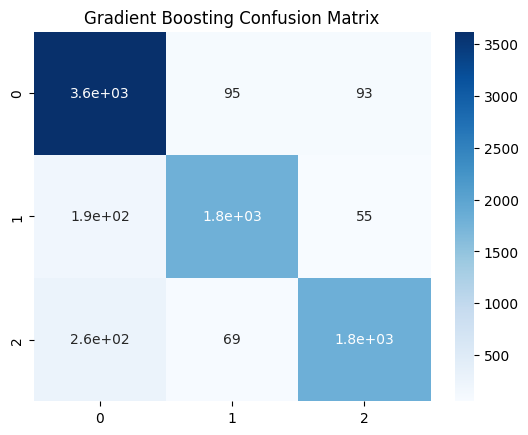

In [ ]:
# Evaluate the model
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_accuracy)

# Generate a classification report
print(classification_report(y_test, y_pred_gb))

# Create a confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()


Support Vector Machine for the Data

In [ ]:
# Train a Support Vector Machine (SVM) model
svm_model = SVC(kernel='rbf', random_state=10)  # You can experiment with different kernels
svm_model.fit(X_train, y_train)



SVC(random_state=10)

In [ ]:
# Make predictions on the testing set
y_pred_svm = svm_model.predict(X_test)



In [ ]:
# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)

# Generate a classification report
print(classification_report(y_test, y_pred_svm))

# Create a confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.show()


In [ ]:
# prompt: hyperparameter support vector grid search

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}
from sklearn.model_selection import GridSearchCV

# Create a GridSearchCV object for SVM
grid_search_svm = GridSearchCV(estimator=SVC(random_state=42),
                               param_grid=param_grid_svm,
                               scoring='accuracy',
                               cv=5,
                               n_jobs=-1)

# Fit the grid search to the data
grid_search_svm.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters (SVM):", grid_search_svm.best_params_)
print("Best Score (SVM):", grid_search_svm.best_score_)

# Get the best model
best_svm_model = grid_search_svm.best_estimator_



# Compare model accuracies

In [ ]:

model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM', ]
accuracies = [dt_accuracy, rf_accuracy, gb_accuracy, svm_accuracy,]

plt.bar(model_names, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis limits for better visualization
plt.show()

# Determine the best model
best_model_index = np.argmax(accuracies)
best_model = model_names[best_model_index]
print(f"The best performing model is: {best_model} with an accuracy of {accuracies[best_model_index]}")


In [ ]:


from flask import Flask, request, jsonify
import pickle

# Load the trained model (replace with your actual model file)
with open('best_model.pkl', 'rb') as f:
  model = pickle.load(f)

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
  """
  Endpoint for making predictions.
  Expects JSON data with features in the request body.
  """
  try:
    data = request.get_json(force=True)
    # Preprocess the input data (e.g., scaling, feature engineering)
    # ...
    prediction = model.predict([data])  # Make prediction
    # Postprocess the prediction if needed
    # ...
    return jsonify({'prediction': prediction.tolist()})  # Return prediction as JSON
  except Exception as e:
    return jsonify({'error': str(e)})

if __name__ == '__main__':
  app.run(debug=True, host='0.0.0.0', port=5000)  # Run the Flask app

# To deploy this:
# 1. Save the code as a Python file (e.g., app.py)
# 2. Save your trained model as a pickle file (e.g., best_model.pkl)
# 3. Install Flask: pip install Flask
# 4. Run the app: python app.py
# 5. Test the API by sending POST requests to http://localhost:5000/predict with JSON data.

# For more robust deployment:
# - Consider using a cloud platform like Google Cloud AI Platform, AWS SageMaker, or Azure Machine Learning.
# - Use a production-ready web framework (e.g., Django, Flask with Gunicorn/uWSGI)
# - Implement error handling, logging, and security measures.
# - Set up continuous integration and continuous deployment (CI/CD) pipelines.
